### WINE QUALITY PREDICTION

#### Wine quality can be predicted either  good(0) and bad(1)
#### Steps followed in preprocessing includes Data cleaning, Outliers Removal, Standardization etc

### LOADING THE DATASET

In [6]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn import metrics
from sklearn.metrics import confusion_matrix
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
sns.set()

In [7]:
data=pd.read_csv('winequality.csv')

In [8]:
data.head(5)

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5


### FINDING THE MISSING VALUES 

In [9]:
data.isna().sum()

fixed acidity           0
volatile acidity        0
citric acid             0
residual sugar          0
chlorides               0
free sulfur dioxide     0
total sulfur dioxide    0
density                 0
pH                      0
sulphates               0
alcohol                 0
quality                 0
dtype: int64

In [11]:
data.info()
#From the result we see that the dataset is clean i.e no misssing values

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1599 entries, 0 to 1598
Data columns (total 12 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   fixed acidity         1599 non-null   float64
 1   volatile acidity      1599 non-null   float64
 2   citric acid           1599 non-null   float64
 3   residual sugar        1599 non-null   float64
 4   chlorides             1599 non-null   float64
 5   free sulfur dioxide   1599 non-null   float64
 6   total sulfur dioxide  1599 non-null   float64
 7   density               1599 non-null   float64
 8   pH                    1599 non-null   float64
 9   sulphates             1599 non-null   float64
 10  alcohol               1599 non-null   float64
 11  quality               1599 non-null   int64  
dtypes: float64(11), int64(1)
memory usage: 150.0 KB


In [12]:
data.describe()
#describing the dataset to know mean,min,max and quantile values

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
count,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000
mean,8.319637,0.527821,0.270976,2.538806,0.087467,15.874922,46.467792,0.996747,3.311113,0.658149,10.422983,5.636023
std,1.741096,0.179060,0.194801,1.409928,0.047065,10.460157,32.895324,0.001887,0.154386,0.169507,1.065668,0.807569
min,4.600000,0.120000,0.000000,0.900000,0.012000,1.000000,6.000000,0.990070,2.740000,0.330000,8.400000,3.000000
25%,7.100000,0.390000,0.090000,1.900000,0.070000,7.000000,22.000000,0.995600,3.210000,0.550000,9.500000,5.000000
50%,7.900000,0.520000,0.260000,2.200000,0.079000,14.000000,38.000000,0.996750,3.310000,0.620000,10.200000,6.000000
75%,9.200000,0.640000,0.420000,2.600000,0.090000,21.000000,62.000000,0.997835,3.400000,0.730000,11.100000,6.000000
max,15.900000,1.580000,1.000000,15.500000,0.611000,72.000000,289.000000,1.003690,4.010000,2.000000,14.900000,8.000000


### DATA CLEANING

#### our target variable that is 'quality'i.e, 'good' or 'bad'. In this case if the quality is greater than 6.5  the quality is good and if quality is less or equal to 6.5 is bad.
#### 'good' is represented by 1 while 'bad' by 0

In [13]:
a = [] #Declaring a new list
for i in data['quality']: 
    if i > 6.5:
        i = 1
        a.append(i)
    else:
        i = 0
        a.append(i)
data['a'] = a # A new column to hold our already categoried quality 

In [14]:
data.head(10)

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality,a
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5,0
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5,0
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5,0
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6,0
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5,0
5,7.4,0.66,0.00,1.8,0.075,13.0,40.0,0.9978,3.51,0.56,9.4,5,0
6,7.9,0.60,0.06,1.6,0.069,15.0,59.0,0.9964,3.30,0.46,9.4,5,0
7,7.3,0.65,0.00,1.2,0.065,15.0,21.0,0.9946,3.39,0.47,10.0,7,1
8,7.8,0.58,0.02,2.0,0.073,9.0,18.0,0.9968,3.36,0.57,9.5,7,1
9,7.5,0.50,0.36,6.1,0.071,17.0,102.0,0.9978,3.35,0.80,10.5,5,0


In [15]:
data.drop('quality', axis = 1, inplace = True) #Dropping the quality column since we won't be needing it anymore

In [16]:
data.head(5)

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,a
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,0
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,0
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,0
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,0
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,0


### OUTLIERS

####  plotting the distribution of our numerical variables will help us to detect outliers and any other abnormalities

In [18]:
data.describe() #shows describption for only numerical variables

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,a
count,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000
mean,8.319637,0.527821,0.270976,2.538806,0.087467,15.874922,46.467792,0.996747,3.311113,0.658149,10.422983,0.135710
std,1.741096,0.179060,0.194801,1.409928,0.047065,10.460157,32.895324,0.001887,0.154386,0.169507,1.065668,0.342587
min,4.600000,0.120000,0.000000,0.900000,0.012000,1.000000,6.000000,0.990070,2.740000,0.330000,8.400000,0.000000
25%,7.100000,0.390000,0.090000,1.900000,0.070000,7.000000,22.000000,0.995600,3.210000,0.550000,9.500000,0.000000
50%,7.900000,0.520000,0.260000,2.200000,0.079000,14.000000,38.000000,0.996750,3.310000,0.620000,10.200000,0.000000
75%,9.200000,0.640000,0.420000,2.600000,0.090000,21.000000,62.000000,0.997835,3.400000,0.730000,11.100000,0.000000
max,15.900000,1.580000,1.000000,15.500000,0.611000,72.000000,289.000000,1.003690,4.010000,2.000000,14.900000,1.000000


<Axes: xlabel='fixed acidity', ylabel='Density'>

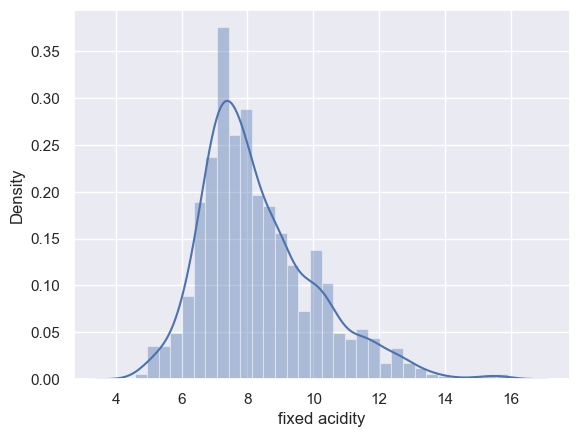

In [19]:
sns.histplot(
    data["fixed acidity"], kde=True,
    stat="density", kde_kws=dict(cut=3),
    alpha=.4, edgecolor=(1, 1, 1, .4)) #we can see those few outliers shown by the longer right tail of the distribution

<Axes: xlabel='fixed acidity', ylabel='Density'>

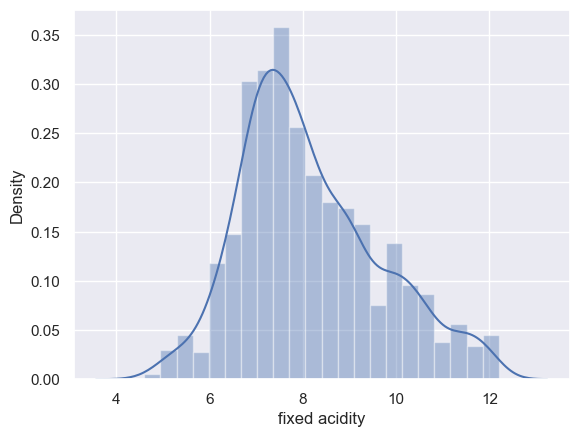

In [22]:
#Removing the top 1% of the observation will help us to deal with the outliers
q = data['fixed acidity'].quantile(0.99)
data = data[data['fixed acidity'] < q]

sns.histplot(
    data["fixed acidity"], kde=True,
    stat="density", kde_kws=dict(cut=3),
    alpha=.4, edgecolor=(1, 1, 1, .4))

<Axes: xlabel='volatile acidity', ylabel='Density'>

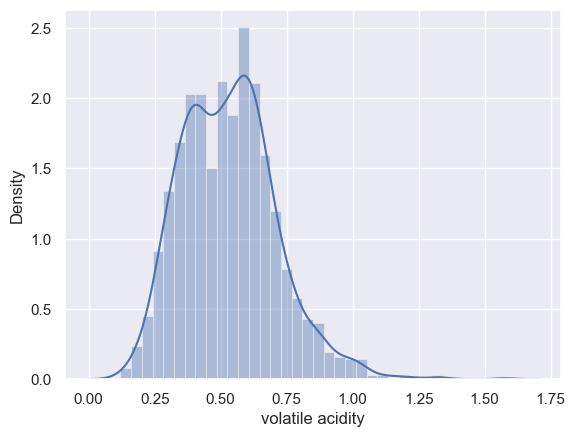

In [23]:
sns.histplot(data['volatile acidity'],kde=True,
    stat="density", kde_kws=dict(cut=3),
    alpha=.4, edgecolor=(1, 1, 1, .4)) #we can see those few outliers shown by the longer right tail of the distribution

<Axes: xlabel='volatile acidity', ylabel='Density'>

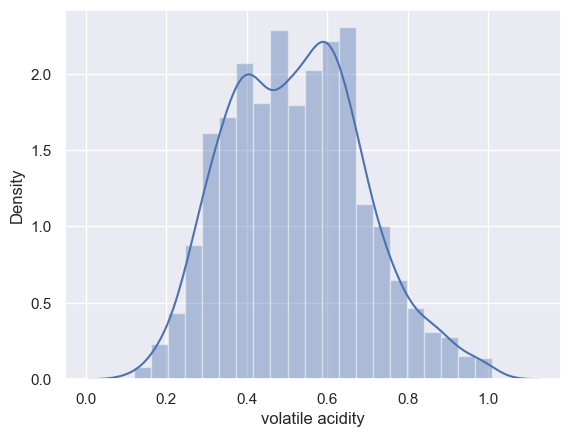

In [24]:
#Removing the top 1% of the observation will help us to deal with the outliers
q = data['volatile acidity'].quantile(0.99)
data = data[data['volatile acidity'] < q]

sns.histplot(data['volatile acidity'],kde=True,
    stat="density", kde_kws=dict(cut=3),
    alpha=.4, edgecolor=(1, 1, 1, .4))

<Axes: xlabel='citric acid', ylabel='Density'>

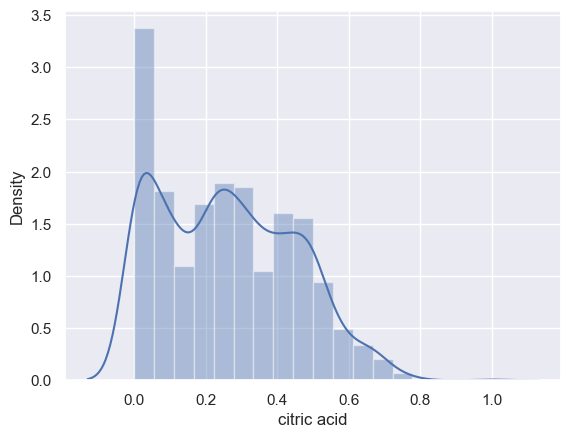

In [25]:
sns.histplot(data['citric acid'],kde=True,
    stat="density", kde_kws=dict(cut=3),
    alpha=.4, edgecolor=(1, 1, 1, .4)) #we can see those few outliers shown by the longer right tail of the distribution

<Axes: xlabel='citric acid', ylabel='Density'>

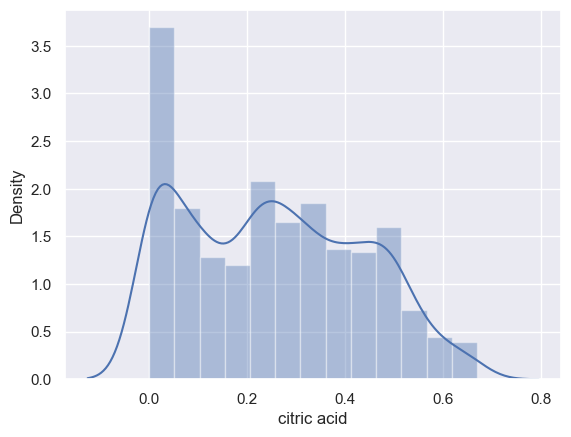

In [26]:
#Removing the top 1% of the observation will help us to deal with the outliers
q = data['citric acid'].quantile(0.99)
data = data[data['citric acid'] < q]

sns.histplot(data['citric acid'],kde=True,
    stat="density", kde_kws=dict(cut=3),
    alpha=.4, edgecolor=(1, 1, 1, .4))

<Axes: xlabel='residual sugar', ylabel='Density'>

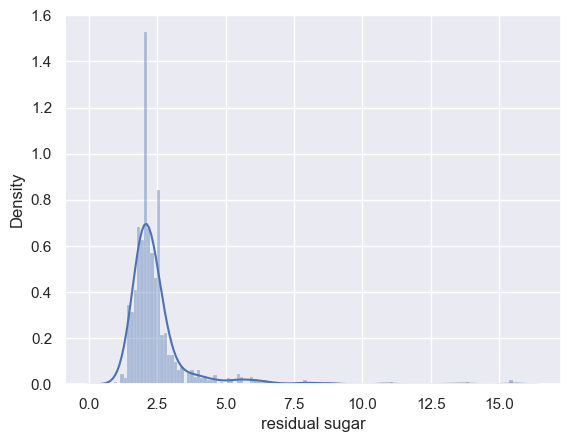

In [27]:
sns.histplot(data['residual sugar'],kde=True,
    stat="density", kde_kws=dict(cut=3),
    alpha=.4, edgecolor=(1, 1, 1, .4)) #we can see those few outliers shown by the longer right tail of the distribution

<Axes: xlabel='residual sugar', ylabel='Density'>

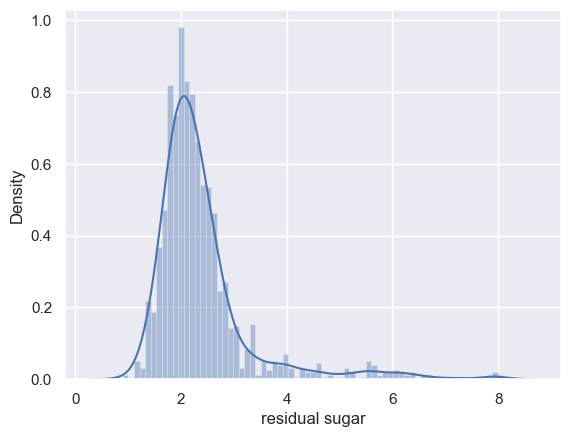

In [28]:
#Removing the top 1% of the observation will help us to deal with the outliers
q = data['residual sugar'].quantile(0.99)
data = data[data['residual sugar'] < q]

sns.histplot(data['residual sugar'],kde=True,
    stat="density", kde_kws=dict(cut=3),
    alpha=.4, edgecolor=(1, 1, 1, .4))

<Axes: xlabel='chlorides', ylabel='Density'>

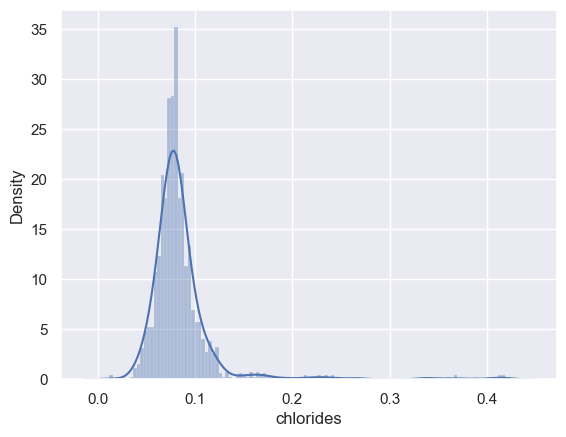

In [29]:
sns.histplot(data['chlorides'],kde=True,
    stat="density", kde_kws=dict(cut=3),
    alpha=.4, edgecolor=(1, 1, 1, .4)) #we can see those few outliers shown by the longer right tail of the distribution

<Axes: xlabel='chlorides', ylabel='Density'>

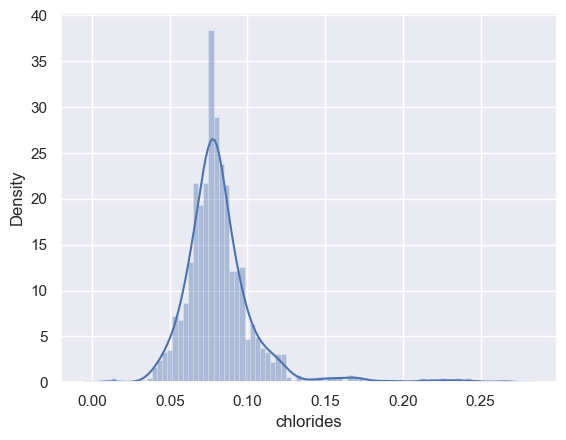

In [30]:
#Removing the top 1% of the observation will help us to deal with the outliers
q = data['chlorides'].quantile(0.99)
data = data[data['chlorides'] < q]

sns.histplot(data['chlorides'],kde=True,
    stat="density", kde_kws=dict(cut=3),
    alpha=.4, edgecolor=(1, 1, 1, .4))

<Axes: xlabel='free sulfur dioxide', ylabel='Density'>

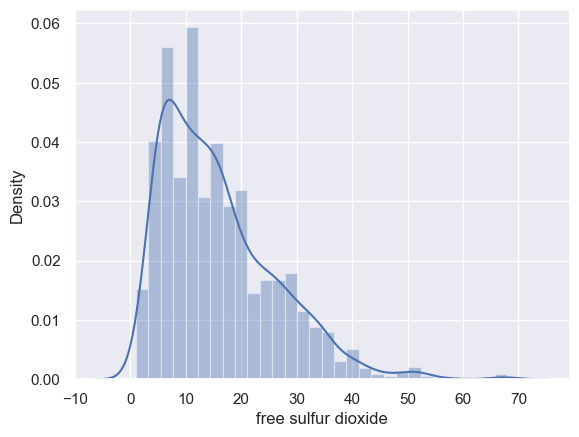

In [31]:
sns.histplot(data['free sulfur dioxide'],kde=True,
    stat="density", kde_kws=dict(cut=3),
    alpha=.4, edgecolor=(1, 1, 1, .4)) #we can see those few outliers shown by the longer right tail of the distribution

<Axes: xlabel='free sulfur dioxide', ylabel='Density'>

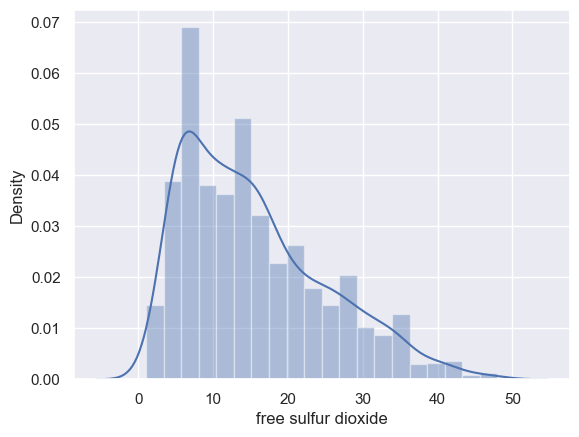

In [32]:
#Removing the top 1% of the observation will help us to deal with the outliers
q = data['free sulfur dioxide'].quantile(0.99)
data = data[data['free sulfur dioxide'] < q]

sns.histplot(data['free sulfur dioxide'],kde=True,
    stat="density", kde_kws=dict(cut=3),
    alpha=.4, edgecolor=(1, 1, 1, .4))

<Axes: xlabel='total sulfur dioxide', ylabel='Density'>

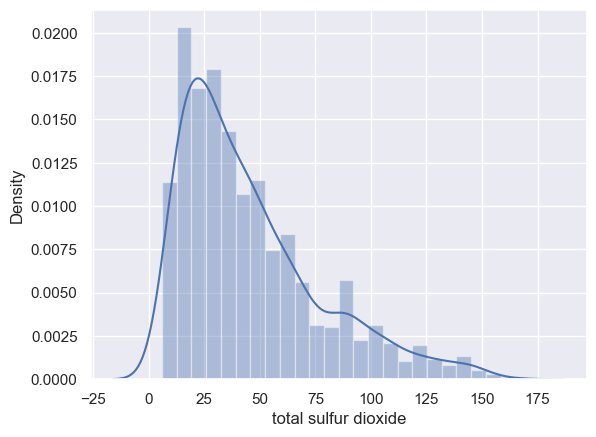

In [33]:
sns.histplot(data['total sulfur dioxide'],kde=True,
    stat="density", kde_kws=dict(cut=3),
    alpha=.4, edgecolor=(1, 1, 1, .4)) #we can see those few outliers shown by the longer right tail of the distribution

<Axes: xlabel='total sulfur dioxide', ylabel='Density'>

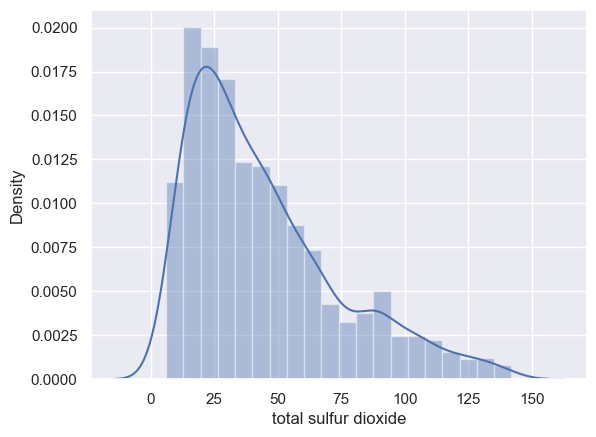

In [34]:
#Removing the top 1% of the observation will help us to deal with the outliers
q = data['total sulfur dioxide'].quantile(0.99)
data = data[data['total sulfur dioxide'] < q]

sns.histplot(data['total sulfur dioxide'],kde=True,
    stat="density", kde_kws=dict(cut=3),
    alpha=.4, edgecolor=(1, 1, 1, .4))

<Axes: xlabel='density', ylabel='Density'>

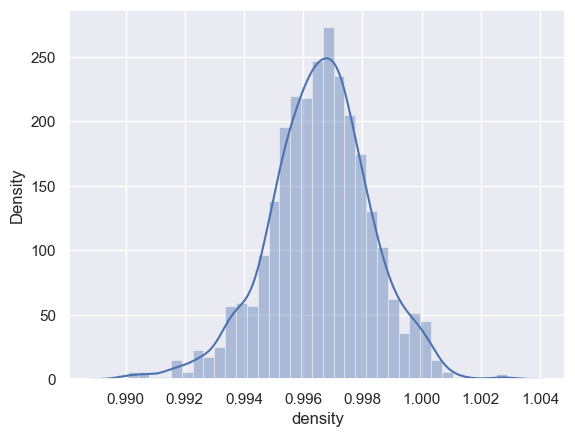

In [35]:
sns.histplot(data['density'],kde=True,
    stat="density", kde_kws=dict(cut=3),
    alpha=.4, edgecolor=(1, 1, 1, .4)) #we can see those few outliers shown by the longer left tail of the distribution

<Axes: xlabel='density', ylabel='Density'>

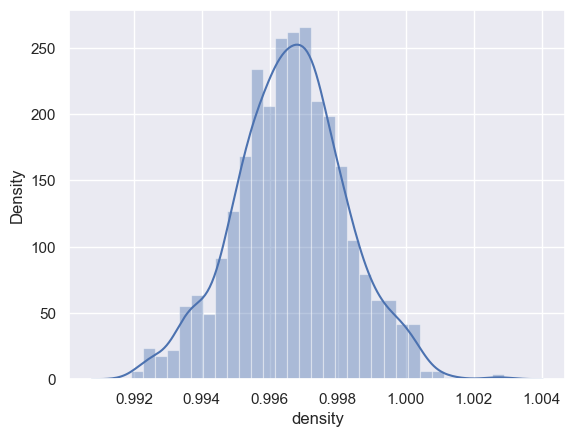

In [36]:
#Removing the bottom 1% of the observation will help us to deal with the outliers
q = data['density'].quantile(0.01)
data = data[data['density'] > q]

sns.histplot(data['density'],kde=True,
    stat="density", kde_kws=dict(cut=3),
    alpha=.4, edgecolor=(1, 1, 1, .4))

<Axes: xlabel='pH', ylabel='Density'>

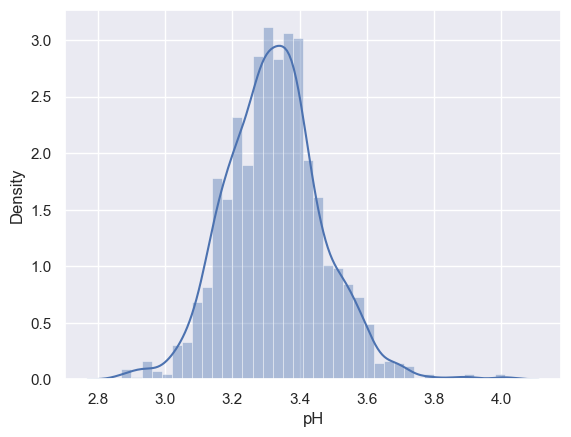

In [37]:
sns.histplot(data['pH'],kde=True,
    stat="density", kde_kws=dict(cut=3),
    alpha=.4, edgecolor=(1, 1, 1, .4)) #we can see those few outliers shown by the longer right tail of the distribution

<Axes: xlabel='pH', ylabel='Density'>

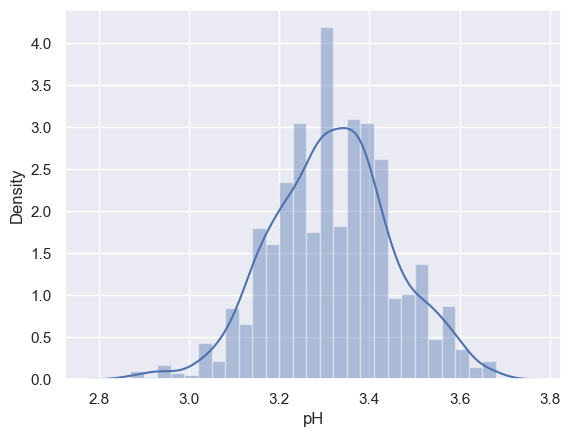

In [38]:
#Removing the top 1% of the observation will help us to deal with the outliers
q = data['pH'].quantile(0.99)
data = data[data['pH'] < q]

sns.histplot(data['pH'],kde=True,
    stat="density", kde_kws=dict(cut=3),
    alpha=.4, edgecolor=(1, 1, 1, .4))

<Axes: xlabel='sulphates', ylabel='Density'>

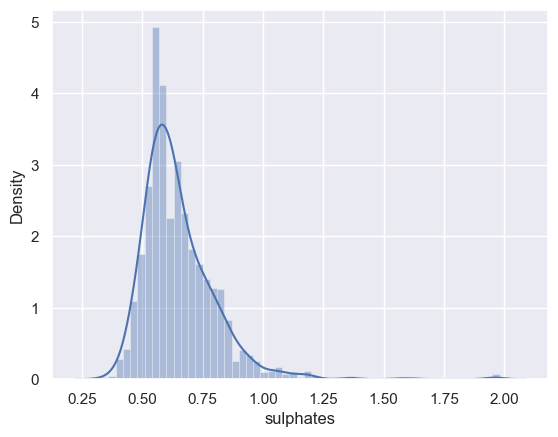

In [39]:
sns.histplot(data['sulphates'],kde=True,
    stat="density", kde_kws=dict(cut=3),
    alpha=.4, edgecolor=(1, 1, 1, .4)) #we can see those few outliers shown by the longer right tail of the distribution

<Axes: xlabel='sulphates', ylabel='Density'>

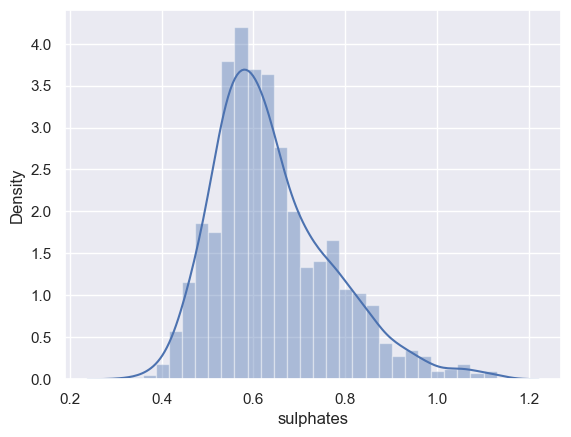

In [40]:
#Removing the top 1% of the observation will help us to deal with the outliers
q = data['sulphates'].quantile(0.99)
data = data[data['sulphates'] < q]

sns.histplot(data['sulphates'],kde=True,
    stat="density", kde_kws=dict(cut=3),
    alpha=.4, edgecolor=(1, 1, 1, .4))

<Axes: xlabel='alcohol', ylabel='Density'>

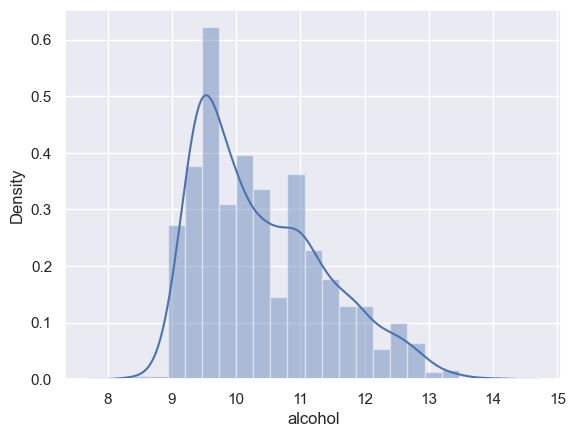

In [41]:
sns.histplot(data['alcohol'],kde=True,
    stat="density", kde_kws=dict(cut=3),
    alpha=.4, edgecolor=(1, 1, 1, .4)) #we can see those few outliers shown by the longer right tail of the distribution

<Axes: xlabel='alcohol', ylabel='Density'>

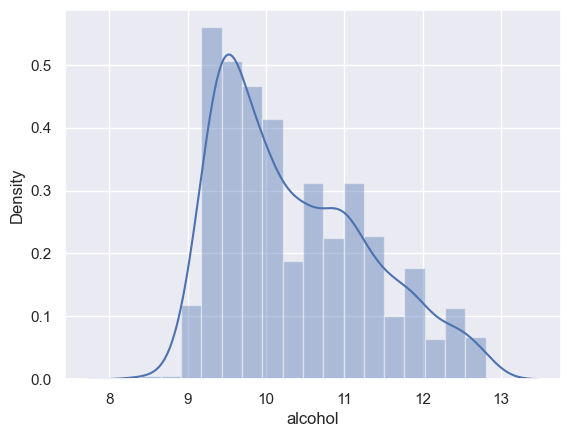

In [42]:
#Removing the top 1% of the observation will help us to deal with the outliers
q = data['alcohol'].quantile(0.99)
data = data[data['alcohol'] < q]

sns.histplot(data['alcohol'],kde=True,
    stat="density", kde_kws=dict(cut=3),
    alpha=.4, edgecolor=(1, 1, 1, .4))

### CHECKING ASSUMPTIONS OF LINEAR REGRESSION

#### Let's check that our dataset are not violating any of this assumptions which includes:
#### 1. No Endogeneity
#### 2. Normality and Homoscedasticity
#### 3.No Autocorrelation OR Normality distribution of error
#### 4.NO multicollinearity: making sure our independents variables are not strongly related(correlated) with each other

####  We are not violating  assumptions 1 through 3 but for NO multicollinearity we need to check

In [45]:
data.columns.values

array(['fixed acidity', 'volatile acidity', 'citric acid',
       'residual sugar', 'chlorides', 'free sulfur dioxide',
       'total sulfur dioxide', 'density', 'pH', 'sulphates', 'alcohol',
       'a'], dtype=object)

In [46]:
from statsmodels.stats.outliers_influence import variance_inflation_factor
from statsmodels.tools.tools import add_constant

# the target column (in this case 'grade') should not be included in variables
#Categorical variables may or maynot be added if any
variables = data[['fixed acidity', 'volatile acidity', 'citric acid',
       'residual sugar', 'chlorides', 'free sulfur dioxide',
       'total sulfur dioxide', 'density', 'pH', 'sulphates', 'alcohol',]]
x = add_constant(variables)
vif = pd.DataFrame()
vif['VIF'] = [variance_inflation_factor(x.values,i) for i in range (x.shape[1])]
vif['features'] = x.columns
vif

#Using 10 as the minimum vif values i.e any independent variable 10 and above will have to be dropped
#From the results all independent variable are below 10

,VIF,features
0,2.100714e+06,const
1,6.391616e+00,fixed acidity
2,1.990277e+00,volatile acidity
3,2.987049e+00,citric acid
4,1.604400e+00,residual sugar
5,1.143260e+00,chlorides
6,2.038446e+00,free sulfur dioxide
7,2.368323e+00,total sulfur dioxide
8,5.434805e+00,density
9,2.870844e+00,pH


### Standardization

#### It helps to give our independent varibles a more standard and relatable numeric scale, it also helps in improving model accuracy

In [48]:
#Declaring independent variable i.e x
#Declaring Target variable i.e y
x = data.drop('a', axis =1 )
y = data['a']

In [49]:
scaler = StandardScaler()
scaler.fit(x)
scaled_x = scaler.transform(x)

### LOGISTIC REGRESSION

In [50]:
#Splitting our data into train and test dataset
x_train, x_test, y_train, y_test = train_test_split(scaled_x, y , test_size = 0.2, random_state  = 365)

In [51]:
reg = LogisticRegression() #select the algorithm
reg.fit(x_train,y_train) # we fit the algorithm with the training data and the training output

LogisticRegression()

In [52]:
y_hat = reg.predict(x_test) # y_hat holding the prediction made with the algorithm using x_test

In [53]:
acc = metrics.accuracy_score(y_hat,y_test)# To know the accuracy
acc

0.8945454545454545

In [54]:
reg.intercept_ # Intercept of the regression

array([-3.12785682])

In [55]:
reg.coef_ # coefficients of the variables / features 

array([[ 0.08373731, -0.49656081, -0.07174527,  0.23643164, -0.22823859,
         0.38659393, -1.04382166, -0.08346822, -0.23446346,  0.67413544,
         0.90352464]])

In [56]:
result = pd.DataFrame(data = x.columns, columns = ['Features'])
result['weight'] = np.transpose(reg.coef_)
result['odds'] = np.exp(np.transpose(reg.coef_))
result

,Features,weight,odds
0,fixed acidity,0.083737,1.087343
1,volatile acidity,-0.496561,0.608620
2,citric acid,-0.071745,0.930768
3,residual sugar,0.236432,1.266721
4,chlorides,-0.228239,0.795934
5,free sulfur dioxide,0.386594,1.471959
6,total sulfur dioxide,-1.043822,0.352106
7,density,-0.083468,0.919920
8,pH,-0.234463,0.790995
9,sulphates,0.674135,1.962336


#### Remember we standardized all independents variables so the odds values have no direct interpretation
#### Nevertheless using acohol as an example we can say for one standard deviation increase in acohol it is twice more likely to cause a change in our target variables

### CONFUSION MATRIX

In [57]:
cm = confusion_matrix(y_hat,y_test)
cm

array([[235,  25],
       [  4,  11]], dtype=int64)

In [58]:
# Format for easier understanding
cm_df = pd.DataFrame(cm)
cm_df.columns = ['Predicted 0','Predicted 1']
cm_df = cm_df.rename(index={0: 'Actual 0',1:'Actual 1'})
cm_df

,Predicted 0,Predicted 1
Actual 0,235,25
Actual 1,4,11


#### Our model predicted '0' correctly 235 times while predicting '0' incorrectly 25 times
#### Also it predicted  '1'  correctly 11 times while predicting '1' incorrectly 4 times

###  USING DECISION TREE AND K NEIGHBOURS

In [65]:
from sklearn.tree import DecisionTreeClassifier #for using Decision Tree Algoithm
from sklearn import svm  #for Support Vector Machine (SVM) Algorithm
from sklearn.neighbors import KNeighborsClassifier  # for K nearest neighbours

In [66]:
dd = DecisionTreeClassifier()
dd.fit(x_train,y_train)
y_1 = dd.predict(x_test)
acc_1 = metrics.accuracy_score(y_1,y_test)
acc_1

0.8836363636363637

In [67]:
sv = svm.SVC() #select the algorithm
sv.fit(x_train,y_train) # we train the algorithm with the training data and the training output
y_2 = sv.predict(x_test) #now we pass the testing data to the trained algorithm
acc_2 = metrics.accuracy_score(y_2,y_test)
acc_2

0.88

In [68]:
knc = KNeighborsClassifier()
knc.fit(x_train,y_train)
y_3 = knc.predict(x_test)
acc_3 = metrics.accuracy_score(y_3,y_test)
acc_3

0.8836363636363637

#### After comparison to some other models, LogisticRegression still gives us the highest (~88%)